#                                              Sentiment Analysis on movie Reviews


## Objective:

.To build a prediction model to predict whether a review on the movie is positive and negative

## About the data:


.It consists of 50000 reviews on a movie.

# Structure/Steps to be Followed:

.Importing Dataset

.Preprocessing Dataset

.Vectorization

.Training and Classification

.Analysis Conclusion



## Acknoweldgment :

This Datset is taken from Kaggle

### Importing library

In [1]:
#Load the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from bs4 import BeautifulSoup
import re,string,unicodedata
import warnings
warnings.filterwarnings('ignore')











In [2]:
data=pd.read_csv(r"C:\Users\vikas pandey\Desktop\IMDB Dataset.csv\IMDB Dataset.csv")

In [3]:
data.shape

(50000, 2)

It have 50000 row and 2 column

## take only 1000 dataset 

In [4]:
data1=data[:1001]

## see first 5 data

In [5]:
data1.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [6]:
data1.isnull().sum()

review       0
sentiment    0
dtype: int64

we can see no null value is present in the data

In [7]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     1001 non-null   object
 1   sentiment  1001 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


both column have text data

In [8]:
data1['sentiment'].value_counts()

positive    501
negative    500
Name: sentiment, dtype: int64

we can see data is balanced

## Text Normalization

In [9]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text
#Apply function on review column
data1['review']=data1['review'].apply(denoise_text)

In [10]:
#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
#Apply function on review column
data1['review']=data1['review'].apply(remove_special_characters)

In [11]:
#Stemming the text
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
#Apply function on review column
data1['review']=data1['review'].apply(simple_stemmer)

## Removing Stopword

In [12]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = word_tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stop]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stop]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text
#Apply function on review column
data1['review']=data1['review'].apply(remove_stopwords)

{'while', 'on', 'yourselves', 'such', "you'd", 'who', 'me', 'how', 'should', 'them', 'have', 'yourself', 'during', 'why', 'd', "isn't", "didn't", 'needn', 'after', 'itself', 'both', "you'll", 'which', 'does', 'wouldn', 't', "shouldn't", 've', "couldn't", "hadn't", 'under', 'up', 'is', 'been', 'do', 'any', 'shan', "wasn't", 'here', "she's", 'same', 'my', 'from', "needn't", "doesn't", 'all', 'a', 'don', 'herself', 'are', 'hasn', "weren't", 'so', "hasn't", 'once', 'too', 'that', 'nor', 'where', "won't", 'when', 'theirs', 'few', 's', 'be', 'or', "don't", 'i', 'an', 'our', 'mightn', 'o', 'for', 'he', 'each', 'she', 'then', "aren't", "mustn't", 'the', 'and', 'didn', 'ma', 'own', 'him', 'further', 'not', 'aren', 'had', 'ain', 'you', 'has', "you've", 'his', 'we', 'weren', 'again', 'won', 'her', 'am', 'couldn', 'at', 'other', "should've", 'doing', 'your', 'they', "you're", 'were', "shan't", 'if', 'wasn', 'himself', 'because', 'these', "it's", 'yours', 'out', 'above', 'y', 'about', 'more', 'some

## convert postive and negative into 0 ,1

In [13]:
data1.sentiment.replace('positive',1,inplace=True)
data1.sentiment.replace('negative',0,inplace=True)
data1.tail()

,review,sentiment
996,hate hate selfawar pretenti inan masquerad art...,0
997,usual tri profession construct critic movi god...,0
998,like go see thi film histori class someth like...,0
999,thi like zoolog textbook given depict anim acc...,0
1000,thi movi aw cant even bother write review thi ...,0


In [14]:
X=data1['review']
X

0       one review ha mention watch 1 Oz episod youll ...
1       wonder littl product film techniqu veri unassu...
2       thought thi wa wonder way spend time hot summe...
3       basic famili littl boy jake think zombi hi clo...
4       petter mattei love time money visual stun film...
                              ...                        
996     hate hate selfawar pretenti inan masquerad art...
997     usual tri profession construct critic movi god...
998     like go see thi film histori class someth like...
999     thi like zoolog textbook given depict anim acc...
1000    thi movi aw cant even bother write review thi ...
Name: review, Length: 1001, dtype: object

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)


In [16]:
x = cv.fit_transform(X).toarray()
x[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [17]:
Y=data1['sentiment']
Y

0       1
1       1
2       1
3       0
4       1
       ..
996     0
997     0
998     0
999     0
1000    0
Name: sentiment, Length: 1001, dtype: int64

## split dataset into train test

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.20, random_state=0)

In [19]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train, Y_train)

LogisticRegression()

In [20]:
Y_pred_logistic = log_reg.predict(x_test)

In [21]:
print("Accuracy Score: ", accuracy_score(Y_test, Y_pred_logistic)) 
print("\nConfusion Matrix: \n", confusion_matrix(Y_test, Y_pred_logistic))
print("\nClassification Report: \n", classification_report(Y_test, Y_pred_logistic))

Accuracy Score:  0.8407960199004975

Confusion Matrix: 
 [[90 19]
 [13 79]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.83      0.85       109
           1       0.81      0.86      0.83        92

    accuracy                           0.84       201
   macro avg       0.84      0.84      0.84       201
weighted avg       0.84      0.84      0.84       201



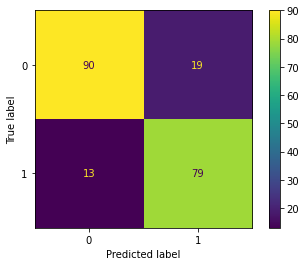

In [22]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(log_reg, x_test, Y_test)
plt.show()

# Naive bayes

In [23]:
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB()
classifier.fit(x_train, Y_train)

BernoulliNB()

In [24]:
y_pred = classifier.predict(x_test)

In [25]:
print("Accuracy Score: ", accuracy_score(Y_test, y_pred))
print("\nConfusion Matrix: \n", confusion_matrix(Y_test, y_pred))
print("\nClassification Report: \n", classification_report(Y_test, y_pred))

Accuracy Score:  0.746268656716418

Confusion Matrix: 
 [[86 23]
 [28 64]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.79      0.77       109
           1       0.74      0.70      0.72        92

    accuracy                           0.75       201
   macro avg       0.75      0.74      0.74       201
weighted avg       0.75      0.75      0.75       201



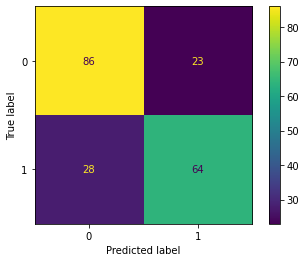

In [26]:
plot_confusion_matrix(classifier, x_test, Y_test)
plt.show()

# support vector machine

In [27]:
from sklearn.svm import SVC
svc = SVC(C=15)
svc.fit(x_train, Y_train)

SVC(C=15)

In [28]:
y_pred_svc = svc.predict(x_test)

In [29]:
print("Accuracy Score: ", accuracy_score(Y_test, y_pred_svc))
print("\nConfusion Matrix: \n", confusion_matrix(Y_test, y_pred_svc))
print("\nClassification Report: \n", classification_report(Y_test, y_pred_svc))

Accuracy Score:  0.8258706467661692

Confusion Matrix: 
 [[89 20]
 [15 77]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.82      0.84       109
           1       0.79      0.84      0.81        92

    accuracy                           0.83       201
   macro avg       0.82      0.83      0.83       201
weighted avg       0.83      0.83      0.83       201



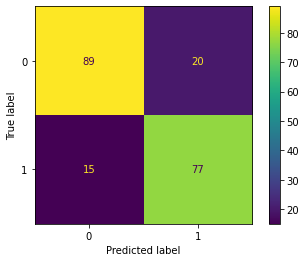

In [30]:
plot_confusion_matrix(svc, x_test, Y_test)
plt.show()

# accuracy

In [31]:
score = { 'Algorithm' : ['Logistic Regression', 'Naive Bayes', 'SVM'], 
          'Accuracy' : [accuracy_score(Y_test, Y_pred_logistic),
                        accuracy_score(Y_test, y_pred),
                        accuracy_score(Y_test, y_pred_svc)]
        }

resultant_df = pd.DataFrame(score).sort_values(by='Accuracy', ascending=False)
resultant_df

,Algorithm,Accuracy
0,Logistic Regression,0.840796
2,SVM,0.825871
1,Naive Bayes,0.746269
